# PyTorch Workflow

Let's explore an example PyTorch end-to-end workflow

In [1]:
what_were_covering = {
                        1: "data(prepare and load)", 
                        2: "build model",
                        3: "train model",
                        4: "evaluate model",
                        5: "save and load model",
                        6: "putting it all together"
                    }

what_were_covering

{1: 'data(prepare and load)',
 2: 'build model',
 3: 'train model',
 4: 'evaluate model',
 5: 'save and load model',
 6: 'putting it all together'}

In [2]:
import torch
from torch import nn # nn contains all of PyTorch's neural network functions
import matplotlib.pyplot as plt

# Check PyTorch version
print(torch.__version__)

2.0.0+cpu


## 1. Data (Preparing and Loading)

Data can be almost anything.. in ML.  
* Excel spreadsheet
* Images of any kind
* Videos
* Audio
* DNA
* Text

Machine Learning is a game of two parts:
1. Get data into a numerical represantaion
2. Build a model to learn patterns in that numerical representation

To showcase this, let's create some **known** data and predict it using a linear regression model.

We'll use a linear regression formla to make a straight line with known **parameters** 

In [4]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step)
print(X)
X = X.unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

tensor([0.0000, 0.0200, 0.0400, 0.0600, 0.0800, 0.1000, 0.1200, 0.1400, 0.1600,
        0.1800, 0.2000, 0.2200, 0.2400, 0.2600, 0.2800, 0.3000, 0.3200, 0.3400,
        0.3600, 0.3800, 0.4000, 0.4200, 0.4400, 0.4600, 0.4800, 0.5000, 0.5200,
        0.5400, 0.5600, 0.5800, 0.6000, 0.6200, 0.6400, 0.6600, 0.6800, 0.7000,
        0.7200, 0.7400, 0.7600, 0.7800, 0.8000, 0.8200, 0.8400, 0.8600, 0.8800,
        0.9000, 0.9200, 0.9400, 0.9600, 0.9800])


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [5]:
len(X), X.shape, len(y), y.shape

(50, torch.Size([50, 1]), 50, torch.Size([50, 1]))

### Splitting Data into Training and Test Sets

In [10]:
# Create a train-test set
train_split = int(0.8 * len(X))
print(train_split)

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

40


(40, 40, 10, 10)

In [11]:
X_train, y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

How might we better visualize our data?

In [8]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
    """
    Plots training data, test data and compares predictions.
    """ 
    plt.figure(figsize=(10, 7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    # Are there predictions?
    if predictions is not None:
        # Plot the predictions if they exist
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    # Show the legend
    plt.legend(prop={"size": 14})

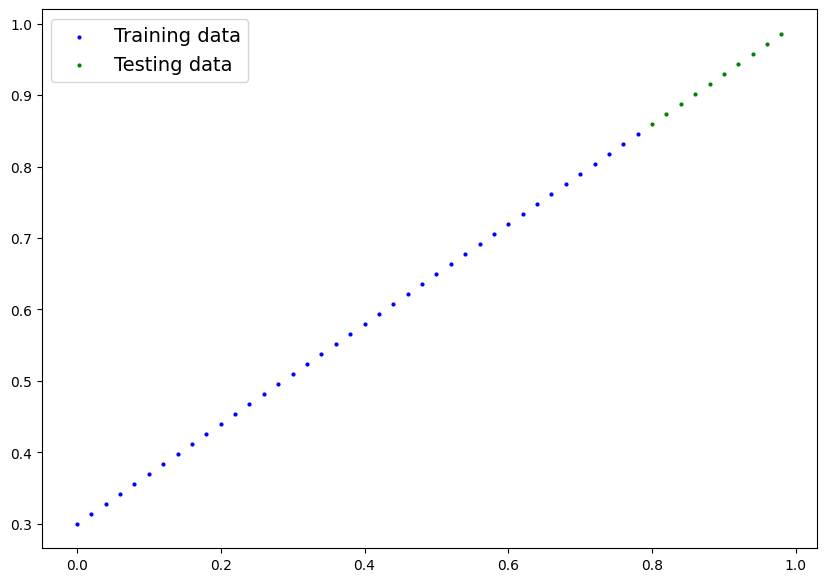

In [15]:
plot_predictions()

## 2. Build model

Our first PyTorch model!  
This will be a simple linear regression model.

What our model does:
* Start with random values (weight and bias)
* Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weight and bias values we used to create the data)

How does it do so??  

Through two main algorithms:
1. Gradient Descent
2. Backpropagation

In [34]:
# Create a linear regression model class
class LinearRegressionModel(nn.Module): # nn.Module is the base class for all models in PyTorch
    def __init__(self): # __init__ method is used to initialize the model
        super().__init__() # super() is used to call the __init__ method of the parent class (nn.Module)
        self.weights = nn.Parameter(torch.randn(1,
                                                requires_grad=True, # For Gradient Descent
                                                dtype=torch.float))
        
        self.bias = nn.Parameter(torch.randn(1,
                                             requires_grad=True,
                                             dtype=torch.float))
        
    # forward() method to define the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # x is torch.Tensor input data and returns a torch.Tensor
        return self.weights * x + self.bias # Linear regression formula

### PyTorch model building essentials

* torch.nn - contains all of the building blocks for computational graphs (a NN can be considered a computational graph)
* torch.nn.Parameter - what parameters should our model try and learn, often a PyTorch layer from torch.nn will set these for us 
* torch.nn.Module - base class for all NN modules, if you subclass it, you should overwrite the forward() function
* torch.optim - this is where the optimizers for training models live, they help with gradient descent
* def forward() - all nn.Module subclasses require you to overwrite forward(), this method defines what happens to the in the forward computation    

### Checking the contents of our PyTorch model

Now that we have created a model, let's see what's inside of it...

So we can check our model parameters or what's inside our model using `.parameters()`

In [35]:
# Create a random seed
RANDOM_SEED = 42
torch.manual_seed(RANDOM_SEED)

# Create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

# Check out the parameters
print(model_0.parameters())

print(list(model_0.parameters()))

<generator object Module.parameters at 0x000001CF07AF4E40>
[Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)]


In [36]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making predictions using `torch.inference_mode()`

To check our model's predictive power, let's see how welll it predicts `y_test` based on `x_test`

When we pass data through out model, it's going to run it through the `forward()` method

In [37]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [41]:
y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

In [42]:
# Make predictions with model
# torch.inference_mode() is better than torch.no_grad()
with torch.inference_mode():
    y_preds = model_0(X_test)

# with torch.no_grad():
#     y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

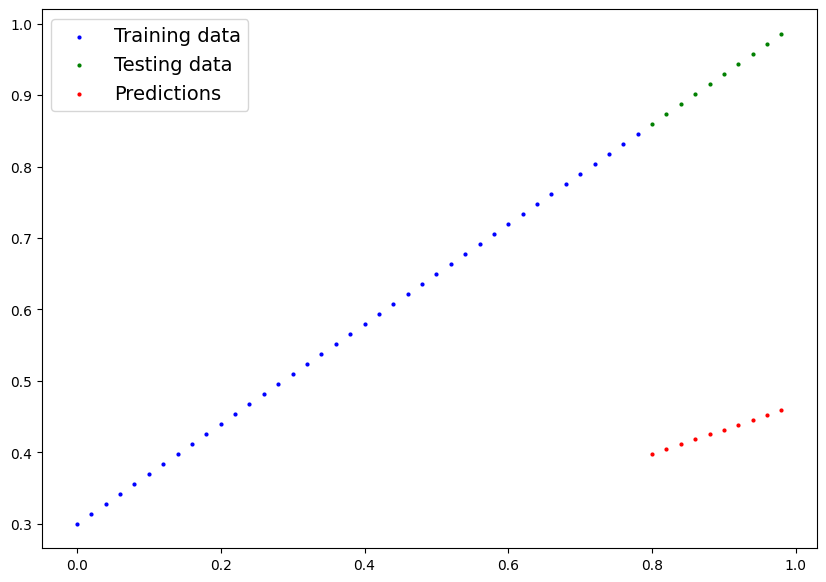

In [40]:
plot_predictions(predictions=y_preds)

## 3. Train Model

The whole idea of training is for a model to move from some *unknown* parameters (these may be random) to some *known* parameters (the ones we used to create the data)

Or in other word from a poor representation of the data to a better representation of the data

One way to measure how poor or how wrong your models predictions are is to use a loss function

* Note: loss function may also be called cost function or criterion in different contexts

Things we need to train: 

* **Loss Function:** A function to measure how wrong your model's predictions are to the ideal outputs, lower loss is better
* **Optimizer:**  Takes into account the loss of a model and adjusts the model's parameters (e.g. weights and bias in our case) to improve the loss function.

And specifically for PyTorch, we need:
* A training loop
* A testing loop

In [46]:
# Check the model's parameters (a parameter is a value that the model sets itself)
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [240]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), 
                            lr=0.01) 

### Building a traning (and testing) loop in PyTorch

A couple of things we need in a training loop:  

0. Loop through the data
1. Forward pass (this involves data moving through our model's `forward()` functions) to mkae predictions on data
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - Backpropagation through the network to calculate the gradients of each of the parameters of our model with respect to the loss
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (**gradient descent**)


In [241]:
torch.manual_seed(RANDOM_SEED)

epochs = 100

# Track different values
epoch_count = []
loss_values = []
test_loss_values = []

### Training
# 0. Loop through the data
for epoch in range(epochs):
    # Set the model to training mode
    model_0.train() # set all params that requires_grad to True

    # 1. Forward pass
    y_pred = model_0(X_train)

    # 2. Calculate loss
    loss = loss_fn(y_pred, y_train)
    print(f"Loss: {loss}")

    # 3. Optimizer zero grad
    optimizer.zero_grad() # set all gradients to zero so that they don't accumulate between batches

    # 4. Backward pass
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_0.eval() # turns off settings like dropout and batch normalization
    with torch.inference_mode():  # turns off gradient tracking, etc
        # 1. Forward pass
        test_pred = model_0(X_test)

        # 2. Calculate loss
        test_loss = loss_fn(test_pred, y_test)

    # Print what is happening every 10 epochs
    if epoch%10 == 0:
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        
        print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")
        print(model_0.state_dict())

Loss: 0.31288138031959534
Epoch: 0 | Loss: 0.31288138031959534 | Test Loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Loss: 0.3013603389263153
Loss: 0.28983935713768005
Loss: 0.2783183455467224
Loss: 0.26679736375808716
Loss: 0.2552763521671295
Loss: 0.24375534057617188
Loss: 0.23223432898521423
Loss: 0.22071333229541779
Loss: 0.20919232070446014
Loss: 0.1976713240146637
Epoch: 10 | Loss: 0.1976713240146637 | Test Loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Loss: 0.18615034222602844
Loss: 0.1746293306350708
Loss: 0.16310831904411316
Loss: 0.1515873372554779
Loss: 0.14006635546684265
Loss: 0.1285453587770462
Loss: 0.11702437698841095
Loss: 0.1060912236571312
Loss: 0.09681284427642822
Loss: 0.08908725529909134
Epoch: 20 | Loss: 0.08908725529909134 | Test Loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Loss: 0.08227583020925522
Loss: 0

In [239]:
torch.manual_seed(RANDOM_SEED)

# Create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [57]:
weight, bias

(0.7, 0.3)

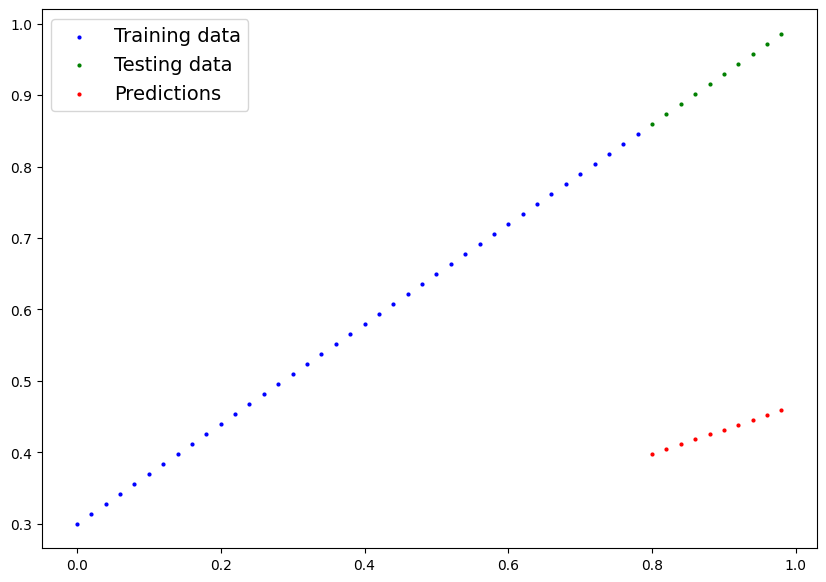

In [192]:
plot_predictions(predictions=y_preds)

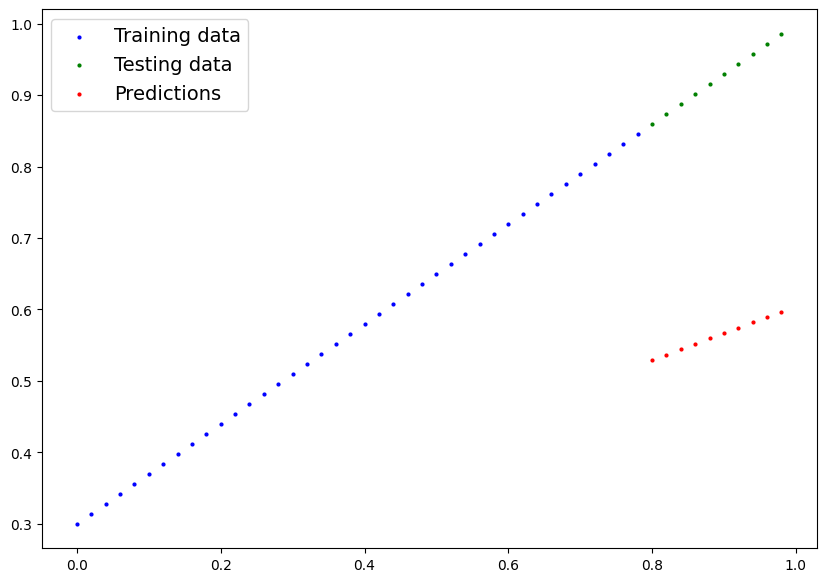

In [227]:
with torch.inference_mode():
    y_preds = model_0(X_test)

plot_predictions(predictions=y_preds)

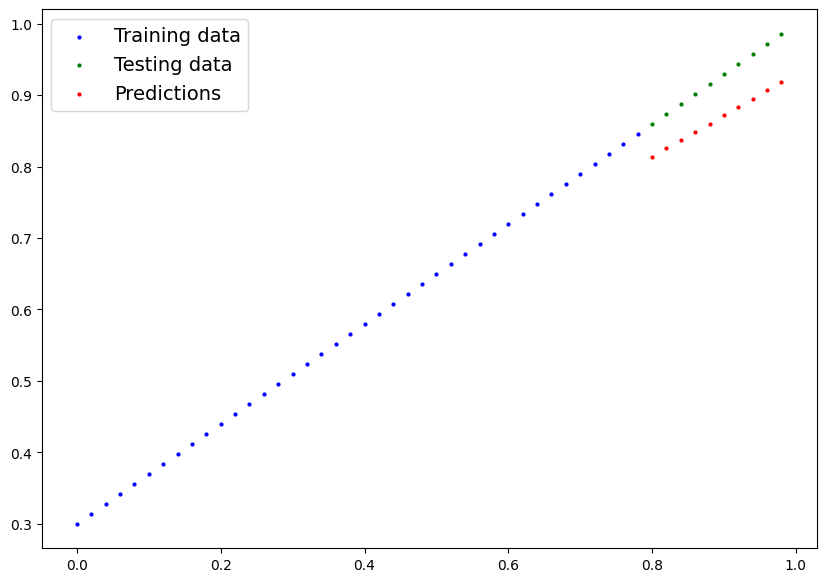

In [238]:
with torch.inference_mode():
    y_preds = model_0(X_test)

plot_predictions(predictions=y_preds)

In [243]:
loss_values, test_loss_values

([tensor(0.3129, grad_fn=<MeanBackward0>),
  tensor(0.1977, grad_fn=<MeanBackward0>),
  tensor(0.0891, grad_fn=<MeanBackward0>),
  tensor(0.0531, grad_fn=<MeanBackward0>),
  tensor(0.0454, grad_fn=<MeanBackward0>),
  tensor(0.0417, grad_fn=<MeanBackward0>),
  tensor(0.0382, grad_fn=<MeanBackward0>),
  tensor(0.0348, grad_fn=<MeanBackward0>),
  tensor(0.0313, grad_fn=<MeanBackward0>),
  tensor(0.0279, grad_fn=<MeanBackward0>)],
 [tensor(0.4811),
  tensor(0.3464),
  tensor(0.2173),
  tensor(0.1446),
  tensor(0.1136),
  tensor(0.0992),
  tensor(0.0889),
  tensor(0.0806),
  tensor(0.0723),
  tensor(0.0647)])

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

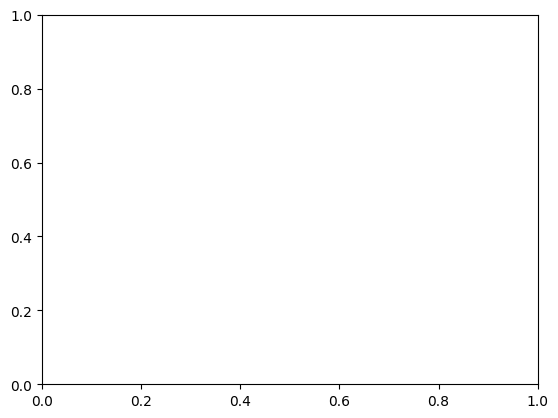

In [242]:
# Plot the loss curves
plt.plot(epoch_count, loss_values, label="Train Loss")
plt.plot(epoch_count, test_loss_values, label="Test Loss")
plt.title("Training vs Test Loss Curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

In [246]:
# Because the test and train loss values are tensors -> errors
import numpy as np

test_loss_values = np.array(test_loss_values)
loss_values = np.array(torch.tensor(loss_values).numpy())

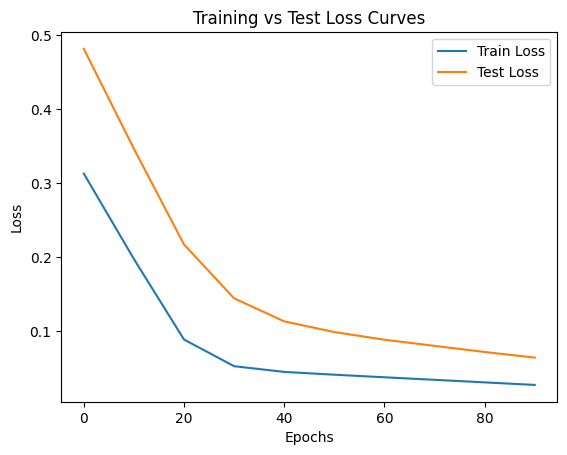

In [247]:
# Plot the loss curves
plt.plot(epoch_count, loss_values, label="Train Loss")
plt.plot(epoch_count, test_loss_values, label="Test Loss")
plt.title("Training vs Test Loss Curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

## 4. Saving a model in PyTorch

There are three main methods you should know about for saving and loading models in PyTorch.

1. `torch.save()` - allows you to save a PyTorch object in Python's pickle format
2. `torch.load()` - allows you to load a saved PyTorch object
3. `torch.nn.Module.load_state_dict()` - allows you to load a model's saved state dictionary

In [248]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])

In [251]:
# Saving our PyTorch model
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True) # If exists, don't do anything

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth" # .pt or .pth is a common extension for PyTorch models
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model state dict to: {MODEL_SAVE_PATH}")

torch.save(obj=model_0.state_dict(),
            f=MODEL_SAVE_PATH)

Saving model state dict to: models\01_pytorch_workflow_model_0.pth


## 5. Loading a PyTorch model

Since we saved our model's `state_dict()` rather than the entire model, we will create a new instance of our model class and load the saved `state_dict()` into it.

In [253]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])

In [255]:
# To load in a saved state_dict, we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()
print("Before loading:")
print(loaded_model_0.state_dict())

# Load the saved state_dict of model_0 (this will update the new instance with updated parameters)
print("\nAfter loading:")
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
print(loaded_model_0.state_dict())

Before loading:
OrderedDict([('weights', tensor([0.2345])), ('bias', tensor([0.2303]))])

After loading:
OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])


In [257]:
# Make some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
    y_preds_loaded = loaded_model_0(X_test)

y_preds == y_preds_loaded # Same predictions - because same model params

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## 6. Putting it all together

Let's go back through the steps above and see it all in one place.

In [2]:
# Import PyTorch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

### 6.1 Data

In [5]:
# Create some data using the linear regression formula of y = weight * features + bias
weight = 0.6
bias = 0.2

# Create range values
start = 0
end = 10
step = 0.02

# Create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.2000],
         [0.2120],
         [0.2240],
         [0.2360],
         [0.2480],
         [0.2600],
         [0.2720],
         [0.2840],
         [0.2960],
         [0.3080]]))

In [6]:
# Split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(400, 400, 100, 100)

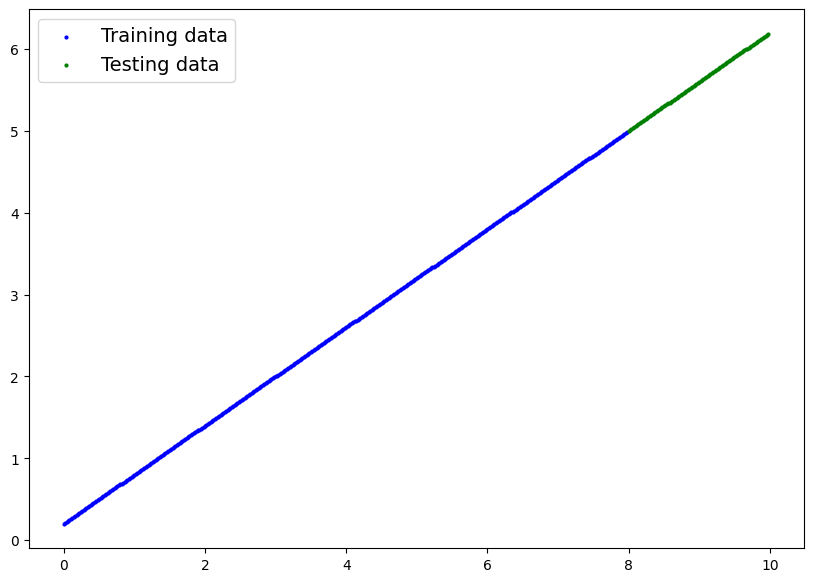

In [9]:
# Plot the data
plot_predictions(X_train, y_train, X_test, y_test)

### 6.2 Building a PyTorch Linear Model

In [14]:
# Create a linear model by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        # Use nn.Linear() for creating the model params (for us: weights and biases)
        self.linear_layer = nn.Linear(in_features=1, # One value of X 
                                      out_features=1, # = One value of Y
                                      bias=True)
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)
    
# Set the manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [15]:
# Set the model to use the target device

# Check the model current device
print(next(model_1.parameters()).device)

# Move the model to the target device
model_1.to(device)
next(model_1.parameters()).device

cpu


device(type='cpu')

### 6.3 Training the PyTorch Model

For training we need:
* Loss function
* Optimizer
* Training loop
* Testing loop

In [16]:
# Setup the loss function
loss_fn = nn.L1Loss()

# Setup the optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), 
                            lr=0.01)

In [17]:
# Training Loop
torch.manual_seed(42)

epochs = 200

# Put the data onto the same device as the model
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

# Track different values
epoch_count = []
loss_values = []
test_loss_values = []

for epoch in range(epochs):
    # Set model to training mode
    model_1.train()

    # Forward pass
    y_preds = model_1(X_train)

    # Calculate loss
    loss = loss_fn(y_preds, y_train)

    # Zero gradients
    optimizer.zero_grad()

    # Backward pass
    loss.backward()

    # Update weights
    optimizer.step()

    ### Testing
    model_1.eval()
    if epoch%10 == 0:
        epoch_count.append(epoch)
        loss_values.append(loss)
        with torch.inference_mode():
            test_preds = model_1(X_test)
            test_loss = loss_fn(test_preds, y_test)
            test_loss_values.append(test_loss)
            print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")

Epoch: 0 | Loss: 1.286516547203064 | Test Loss: 1.7405080795288086
Epoch: 10 | Loss: 0.2283201813697815 | Test Loss: 0.32999342679977417
Epoch: 20 | Loss: 0.21162991225719452 | Test Loss: 0.30731400847435
Epoch: 30 | Loss: 0.19494058191776276 | Test Loss: 0.28206706047058105
Epoch: 40 | Loss: 0.17824901640415192 | Test Loss: 0.2568199634552002
Epoch: 50 | Loss: 0.16155917942523956 | Test Loss: 0.2341403067111969
Epoch: 60 | Loss: 0.14486941695213318 | Test Loss: 0.20889341831207275
Epoch: 70 | Loss: 0.12817785143852234 | Test Loss: 0.18364650011062622
Epoch: 80 | Loss: 0.11148848384618759 | Test Loss: 0.16096660494804382
Epoch: 90 | Loss: 0.09480083733797073 | Test Loss: 0.13833974301815033
Epoch: 100 | Loss: 0.07811668515205383 | Test Loss: 0.11570480465888977
Epoch: 110 | Loss: 0.06401481479406357 | Test Loss: 0.15009520947933197
Epoch: 120 | Loss: 0.050476640462875366 | Test Loss: 0.138038769364357
Epoch: 130 | Loss: 0.08716021478176117 | Test Loss: 0.2912486791610718
Epoch: 140 | L

In [21]:
model_1.state_dict(), weight, bias

(OrderedDict([('linear_layer.weight', tensor([[0.6007]])),
              ('linear_layer.bias', tensor([0.2188]))]),
 0.6,
 0.2)

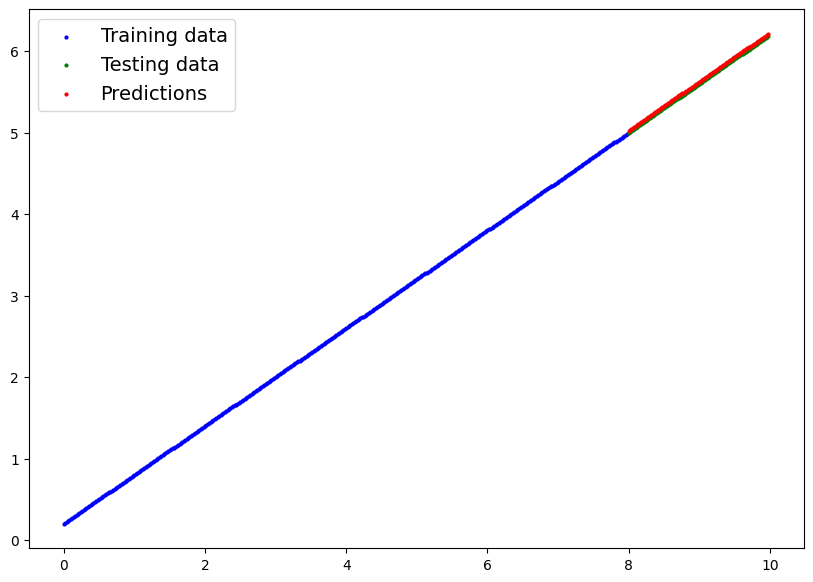

In [24]:
model_1.eval()

with torch.inference_mode():
    y_preds = model_1(X_test)

X_train_numpy = X_train.cpu().detach().numpy()
y_train_numpy = y_train.cpu().detach().numpy()
X_test_numpy = X_test.cpu().detach().numpy()
y_test_numpy = y_test.cpu().detach().numpy()
y_preds_numpy = y_preds.cpu().detach().numpy()

plot_predictions(X_train_numpy, y_train_numpy, X_test_numpy, y_test_numpy, predictions=y_preds_numpy)

### 6.4 Saving the model

In [25]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True) # If exists, don't do anything

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth" # .pt or .pth is a common extension for PyTorch models
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model state dict to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model state dict to: models\01_pytorch_workflow_model_1.pth


In [26]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6007]])),
             ('linear_layer.bias', tensor([0.2188]))])

### 6.5 Loading the model

In [27]:
loaded_model_1 = LinearRegressionModelV2()
loaded_model_1.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6007]])),
             ('linear_layer.bias', tensor([0.2188]))])